In [9]:
# add the violin plots of each cluster across different features to come to conclusions...
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import decomposition
from sklearn.cluster import KMeans
import random

%matplotlib inline

# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv', low_memory=False, header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

# split the data and labels in training and testing segments
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [2]:
# 3-fold cross validated hyperparameter fine tuning with gridsearchcv

# # Hyperparameter optimization for LinearSVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# max_iter_range = [100, 500, 1000]
# parameters = {"C":C_range, "max_iter":max_iter_range}
# clf = GridSearchCV(lsvc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for SVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# parameters = {"C":C_range}
# clf = GridSearchCV(svc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for KNN using Grid Search Cross-Validation
# parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'leaf_size': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(knn, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Decision Tree using Grid Search Cross-Validation
# parameters = [{'max_features': ['auto', 'log2'], 'max_depth': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(dt, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Random Forest using Grid Search Cross-Validation
# parameters = [{"n_estimators": [5, 10, 20, 50]}]
# clf = GridSearchCV(rf, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

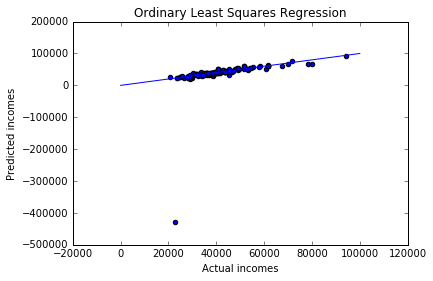

('RMSE:', 1    36689.816812
dtype: float64)
('r2:', -9.3883447707749657)


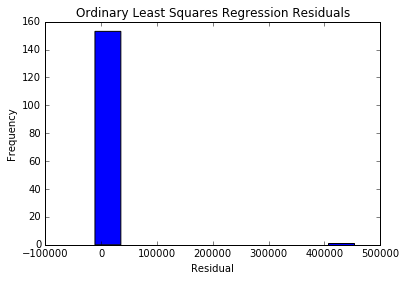

                                                               1
Pennsylvania State University-Penn State York      -11048.331009
Sarah Lawrence College                              -9784.011174
Argosy University-San Francisco Bay Area            -9176.861938
Pennsylvania State University-Penn State Great ...  -9115.820774
Pennsylvania State University-College of Medicine   -9115.597204
South University-The Art Institute of Dallas        -8953.949183
Argosy University-Sarasota                          -8392.457276
SUNY Downstate Medical Center                       -6252.551977
LIU Brentwood                                       -5990.623546
University of California-Riverside                  -5314.960500
                                                         1
Rabbinical College of Ch'san Sofer New York  452837.498143
Amridge University                            13965.754458
Marshall B Ketchum University                 13217.583625
Stanford University                            99

/Users/kevinliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kevinliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


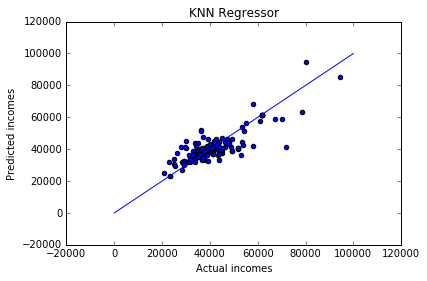

('RMSE:', 1    6391.461837
dtype: float64)
('r2:', 0.68474958411714604)


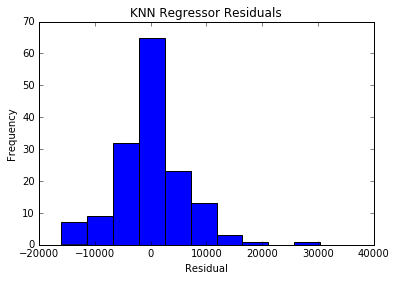

                                             1
Metropolitan State University of Denver -15960
Argosy University-Los Angeles           -15500
Sarah Lawrence College                  -15320
Marshall B Ketchum University           -14860
Earlham College                         -13500
Laguna College of Art and Design        -11560
San Francisco Art Institute             -11540
Smith College                           -10880
Saint Mary-of-the-Woods College         -10680
Dartmouth College                       -10220
                                                        1
SUNY Downstate Medical Center                       30360
Bellevue University                                 16660
Case Western Reserve University                     16140
Stanford University                                 15400
Walsh College of Accountancy and Business Admin...  12120
Butler University                                   11240
Gwynedd Mercy University                            10800
California Maritime

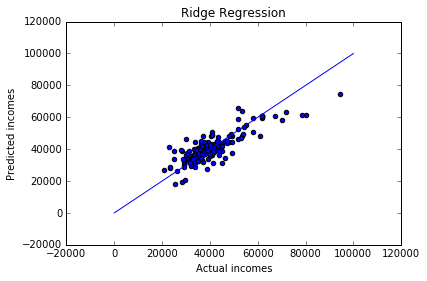

('RMSE:', 1    6223.472708
dtype: float64)
('r2:', 0.70110348825124502)


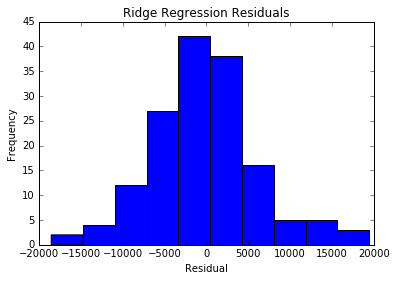

                                                            1
Rabbinical College of Ch'san Sofer New York     -18535.184094
Sarah Lawrence College                          -16165.882988
Argosy University-Sarasota                      -14299.540577
Yeshiva of Nitra Rabbinical College             -13995.855132
Smith College                                   -11574.077573
Earlham College                                 -11381.139753
North Carolina A & T State University           -10888.702289
University of North Carolina School of the Arts -10842.013916
Tufts University                                -10287.430535
Pennsylvania State University-Penn State York    -9729.923258
                                                    1
Midwestern University-Downers Grove      19456.034645
Marshall B Ketchum University            18694.259409
Stanford University                      16706.024534
Amridge University                       13662.202644
Rensselaer Polytechnic Institute         12772.1

/Users/kevinliu/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


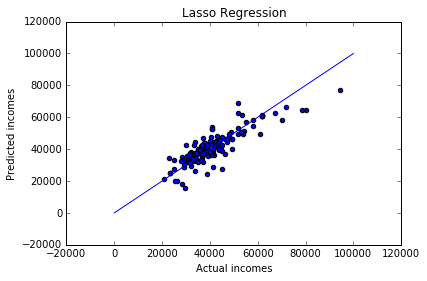

('RMSE:', 1    5746.551761
dtype: float64)
('r2:', 0.74515864024798417)


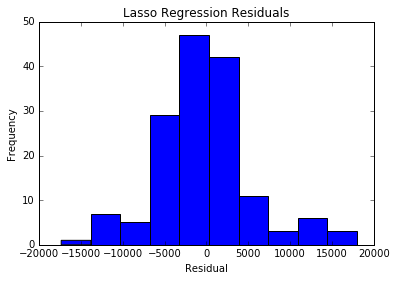

                                                               1
Argosy University-Sarasota                         -17342.071319
Pennsylvania State University-Penn State York      -12803.379185
Sarah Lawrence College                             -12497.836842
Pennsylvania State University-Penn State Great ... -11446.475231
Pennsylvania State University-College of Medicine  -11446.033264
Rabbinical College of Ch'san Sofer New York        -11425.991689
Argosy University-San Francisco Bay Area           -11088.472160
North Carolina A & T State University              -10881.897592
Smith College                                      -10039.803639
South University-The Art Institute of Dallas        -9162.676839
                                                    1
Amridge University                       17963.359461
Midwestern University-Downers Grove      16811.005564
Marshall B Ketchum University            15353.147477
The University of Alabama                14164.673921
Laguna College 

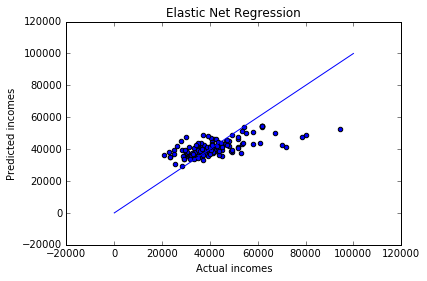

('RMSE:', 1    8722.364741
dtype: float64)
('r2:', 0.41288421756070626)


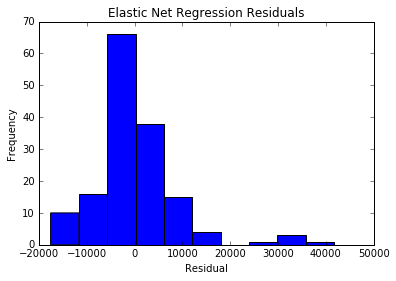

                                                               1
Earlham College                                    -17565.786088
Sarah Lawrence College                             -17530.386082
Rabbinical College of Ch'san Sofer New York        -15536.465684
Caribbean University-Vega Baja                     -15391.137429
San Francisco Art Institute                        -15384.303824
Yeshiva of Nitra Rabbinical College                -14752.300696
Inter American University of Puerto Rico-San Ge... -11965.225723
Appalachian Bible College                          -11929.706420
Smith College                                      -11886.999499
Inter American University of Puerto Rico-Arecibo   -11759.100703
                                                1
Midwestern University-Downers Grove  41673.481708
Marshall B Ketchum University        31072.360089
Stanford University                  31069.146727
SUNY Downstate Medical Center        29966.321795
California Maritime Academy        

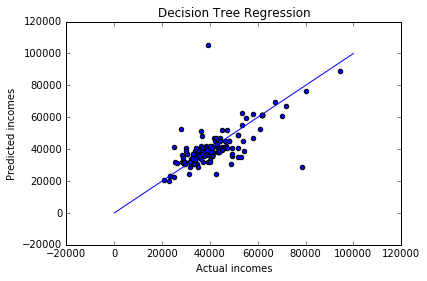

('RMSE:', 1    8978.789155
dtype: float64)
('r2:', 0.37785614687544067)


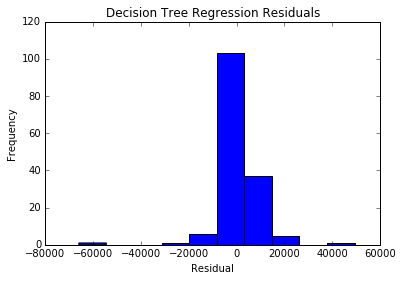

                                                            1
University of Tulsa                             -66000.000000
Earlham College                                 -25000.000000
Appalachian Bible College                       -16722.222222
Argosy University-Los Angeles                   -15500.000000
Hilbert College                                 -11475.000000
Saint Mary-of-the-Woods College                 -10895.483871
Clarkson University                              -9700.000000
Sarah Lawrence College                           -8558.823529
University of North Carolina School of the Arts  -8163.829787
Edinboro University of Pennsylvania              -6646.086957
                                                     1
Stanford University                       49300.000000
Notre Dame of Maryland University         18180.000000
Allen College                             17733.333333
Bellevue University                       17675.000000
Argosy University-San Francisco Bay Area  1

/Users/kevinliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


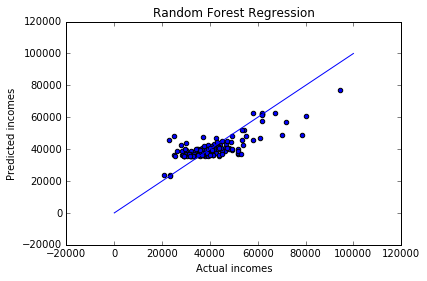

('RMSE:', 1    7259.387235
dtype: float64)
('r2:', 0.5933177713733998)


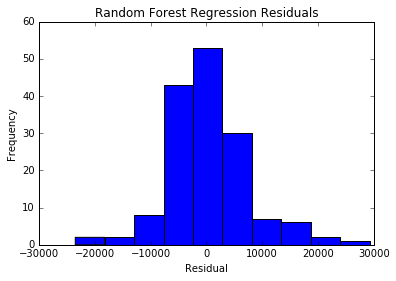

                                                            1
Yeshiva of Nitra Rabbinical College             -23493.789306
Rabbinical College of Ch'san Sofer New York     -22734.789971
Earlham College                                 -14695.350998
Sarah Lawrence College                          -13787.982332
San Francisco Art Institute                     -12295.053994
Appalachian Bible College                       -11734.278195
University of North Carolina School of the Arts -10843.729504
Smith College                                   -10722.562199
Laguna College of Art and Design                -10286.921186
Central State University                        -10114.520124
                                                               1
Stanford University                                 29247.060327
California Maritime Academy                         20841.062856
Marshall B Ketchum University                       19217.944182
Midwestern University-Downers Grove                 16963.

In [3]:
def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def rmse(y_test, y_predict):    
    a = y_test - y_predict
    a = a ** 2
    a = a.mean()
    a = np.sqrt(a)
    return a 

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_test-y_predict)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def listTenLargestResiduals(y_predict, y_test):
    residuals = y_test-y_predict
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    y_predict = np.reshape(y_predict, (len(y_predict),1))    
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)
        
regress(linear_model.LinearRegression(), 'Ordinary Least Squares Regression')
regress(KNeighborsRegressor(), "KNN Regressor")
regress(linear_model.Ridge(), 'Ridge Regression')
regress(linear_model.Lasso(), 'Lasso Regression')
regress(linear_model.ElasticNet(), 'Elastic Net Regression')
regress(DecisionTreeRegressor(max_depth=10), 'Decision Tree Regression')
regress(RandomForestRegressor(n_estimators = 100, max_depth = 5, warm_start = False), 'Random Forest Regression')

In [4]:
# feature importance 

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
coef = pd.DataFrame(reg.coef_.T, index=x.columns.values)
coef = coef.sort(0,axis=0, ascending=False)
coef

/Users/kevinliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0
PCIP29,7.353021e+09
PCIP41,6.897019e+09
PCIP49,6.723350e+09
PCIP01,6.716215e+09
PCIP16,6.659691e+09
PCIP46,6.658260e+09
PCIP51,6.651051e+09
PCIP45,6.628558e+09
PCIP04,6.626924e+09
PCIP44,6.624083e+09


In [5]:
from sklearn.feature_selection import SelectFromModel
print(x.shape)
reg = linear_model.LinearRegression().fit(x, y)
x_new = SelectFromModel(reg, prefit=True).transform(x)
print(x_new.shape)

(1534, 230)
(1534, 21)


/Users/kevinliu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


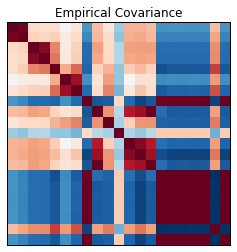

In [6]:
# plotting covariance matrix after feature selection
# http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
x_new = SelectKBest(f_regression, k=21).fit_transform(x, y)
x_norm = []
x_norm[:] = x_new[:]
x_norm = np.asarray(x_norm)
x_norm -= x_norm.mean(axis=0)
x_norm /= x_norm.std(axis=0)

emp_cov = np.dot(x_norm.T, x_norm) / len(x_norm)
vmax = emp_cov.max()
vmin = emp_cov.min()
plt.imshow(emp_cov, interpolation='nearest', vmin=vmin, vmax=vmax,
           cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.title('Empirical Covariance')
plt.show()

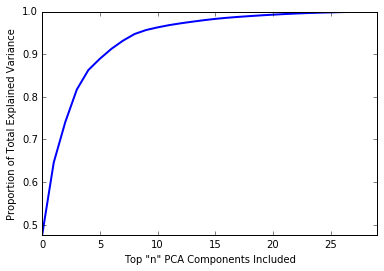

In [7]:
# PCA, number of features vs feature importance
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#example-plot-digits-pipe-py
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)

var_explained_cuml = []
var_explained_cuml.append(pca.explained_variance_ratio_[0])

for i in range(1, 30):
    var_explained_cuml.append(var_explained_cuml[i-1]+pca.explained_variance_ratio_[i])
plt.plot(var_explained_cuml, linewidth=2)
plt.axis('tight')
plt.xlabel('Top "n" PCA Components Included')
plt.ylabel('Proportion of Total Explained Variance')

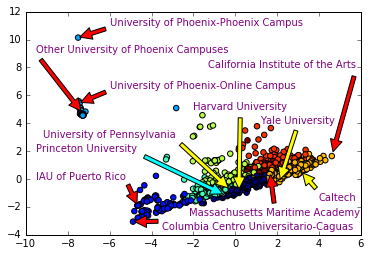

In [8]:
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca_reduced = pca.fit_transform(x)
x_pca_reduced_pd = pd.DataFrame(data=x_pca_reduced, index=list_schools, columns=['e1', 'e2'])  # 1st row as the column names

clusters = KMeans().fit_predict(x) #n_clusters=5
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_pca_reduced_pd.ix[:, 0], x_pca_reduced_pd.ix[:, 1], c=clusters, s=30)

# Harvard University
ax.annotate(x_pca_reduced_pd.index.values[516], xy=(x_pca_reduced_pd.ix[516,'e1'],x_pca_reduced_pd.ix[516,'e2']), 
            xytext=(-2,5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Phoenix - Phoenix Campus
ax.annotate(x_pca_reduced_pd.index.values[31], xy=(x_pca_reduced_pd.ix[31,'e1'], x_pca_reduced_pd.ix[31,'e2']), 
            xytext=(-6,11), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Princeton University
ax.annotate(x_pca_reduced_pd.index.values[726], xy=(x_pca_reduced_pd.ix[726,'e1'], x_pca_reduced_pd.ix[726,'e2']), 
            xytext=(-9.5,2), color='purple', arrowprops=dict(facecolor='cyan', shrink=0.05))

# Massachusetts Maritime Academy
ax.annotate(x_pca_reduced_pd.index.values[525], xy=(x_pca_reduced_pd.ix[525,'e1'], x_pca_reduced_pd.ix[525,'e2']), 
            xytext=(-2.2,-2.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# California Institute of the Arts
ax.annotate(x_pca_reduced_pd.index.values[82], xy=(x_pca_reduced_pd.ix[82,'e1'], x_pca_reduced_pd.ix[82,'e2']), 
            xytext=(-1.3,8), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# University of Phoenix - Online Campus
ax.annotate(x_pca_reduced_pd.index.values[1434], xy=(x_pca_reduced_pd.ix[1434,'e1'], x_pca_reduced_pd.ix[1434,'e2']), 
            xytext=(-6,6.5), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Other University of Phoenix Campuses
ax.annotate('Other University of Phoenix Campuses', xy=(x_pca_reduced_pd.ix[1499,'e1'], x_pca_reduced_pd.ix[1499,'e2']), 
            xytext=(-9.5,9.1), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Yale University
ax.annotate(x_pca_reduced_pd.index.values[180], xy=(x_pca_reduced_pd.ix[180,'e1'], x_pca_reduced_pd.ix[180,'e2']), 
            xytext=(1.2,4), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# University of Pennsylvania
ax.annotate(x_pca_reduced_pd.index.values[1076], xy=(x_pca_reduced_pd.ix[1076,'e1'], x_pca_reduced_pd.ix[1076,'e2']), 
            xytext=(-9.2,3), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Columbia Centro Universitario-Caguas
ax.annotate(x_pca_reduced_pd.index.values[1379], xy=(x_pca_reduced_pd.ix[1379,'e1'], x_pca_reduced_pd.ix[1379,'e2']), 
            xytext=(-3.5,-3.6), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

# Caltech
ax.annotate('Caltech', xy=(x_pca_reduced_pd.ix[56,'e1'], x_pca_reduced_pd.ix[56,'e2']), 
            xytext=(4,-1.5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Inter American University of Puerto Rico
ax.annotate('IAU of Puerto Rico', xy=(x_pca_reduced_pd.ix[1391,'e1'], x_pca_reduced_pd.ix[1391,'e2']), 
            xytext=(-9.5,0), color='purple', arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

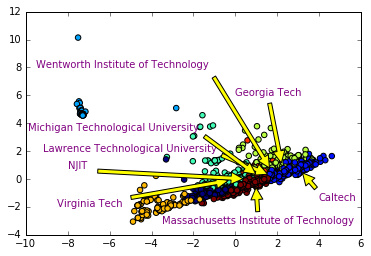

In [53]:
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca_reduced = pca.fit_transform(x)
x_pca_reduced_pd = pd.DataFrame(data=x_pca_reduced, index=list_schools, columns=['e1', 'e2'])  # 1st row as the column names

clusters = KMeans().fit_predict(x) #n_clusters=5
fig = plt.figure()
ax_tech = fig.add_subplot(111)
ax_tech.scatter(x_pca_reduced_pd.ix[:, 0], x_pca_reduced_pd.ix[:, 1], c=clusters, s=30)

# MIT
ax_tech.annotate(x_pca_reduced_pd.index.values[524], xy=(x_pca_reduced_pd.ix[524,'e1'],x_pca_reduced_pd.ix[524,'e2']), 
            xytext=(-3.5,-3.2), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Caltech
ax_tech.annotate('Caltech', xy=(x_pca_reduced_pd.ix[56,'e1'], x_pca_reduced_pd.ix[56,'e2']), 
            xytext=(4,-1.5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Virginia Tech
ax_tech.annotate('Virginia Tech', xy=(x_pca_reduced_pd.ix[1300,'e1'],x_pca_reduced_pd.ix[1300,'e2']), 
            xytext=(-8.5,-2), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Wentworth Institute of Technology
ax_tech.annotate(x_pca_reduced_pd.index.values[545], xy=(x_pca_reduced_pd.ix[545,'e1'],x_pca_reduced_pd.ix[545,'e2']), 
            xytext=(-9.5,8), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Georgia Tech
ax_tech.annotate('Georgia Tech', xy=(x_pca_reduced_pd.ix[247,'e1'],x_pca_reduced_pd.ix[247,'e2']), 
            xytext=(0,6), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Lawrence Technological University
ax_tech.annotate(x_pca_reduced_pd.index.values[568], xy=(x_pca_reduced_pd.ix[568,'e1'],x_pca_reduced_pd.ix[568,'e2']), 
            xytext=(-9.2,2), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# Michigan Technological University
ax_tech.annotate(x_pca_reduced_pd.index.values[574], xy=(x_pca_reduced_pd.ix[574,'e1'],x_pca_reduced_pd.ix[574,'e2']), 
            xytext=(-9.9,3.5), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

# NJIT
ax_tech.annotate('NJIT', xy=(x_pca_reduced_pd.ix[725,'e1'],x_pca_reduced_pd.ix[725,'e2']), 
            xytext=(-8,.75), color='purple', arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.show()

In [51]:
for i in range(len(x_pca_reduced_pd)):
    if x_pca_reduced_pd.index.values[i] == 'Stevens Institute of Technology':
        print(i)

735


In [10]:
a = x_pca_reduced_pd[x_pca_reduced_pd['e1'] < -4]
a[a['e1'] > -6]

,e1,e2
American University of Puerto Rico,-4.560367,-2.777827
American University of Puerto Rico,-4.553204,-2.771217
Atlantic University College,-4.497248,-2.886249
Bayamon Central University,-4.161834,-2.622150
Columbia Centro Universitario-Caguas,-4.883708,-3.055128
Caribbean University-Bayamon,-4.533810,-2.789856
Caribbean University-Carolina,-4.499868,-2.767517
Pontifical Catholic University of Puerto Rico-Arecibo,-4.216308,-2.395900
Pontifical Catholic University of Puerto Rico-Ponce,-4.138826,-2.313209
Universidad Metropolitana,-4.344938,-2.235269
